In [1]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 02bda1e5-0537-481e-9261-b705b85930bd

In [2]:
# Premade libraries
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point, LineString

In [3]:
# Homemade functions
import Vision.vision as vs
import Global_Navigation.robot as rbt
import Global_Navigation.global_navigation as glb
import Motion_Control.thymio_control as ctrl

## Mise a niveau des template

In [4]:
cap = cv2.VideoCapture(1)
vs.get_image(cap)
cap.release()

In [13]:
# Main
# Data
margin = 30

# Initialisation
# Create an instance of our robot
thymio = rbt.RobotNav()
# Start the video capture
cap = cv2.VideoCapture(1)

center1
(320.0, 372.0)
center2
(357.5, 344.0)
shapes
start coord
(338.75, 358.0)
(88.5, 375.5)


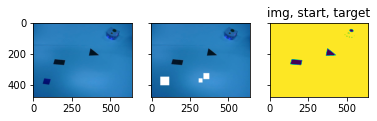

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 250.00it/s]


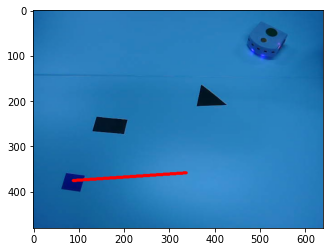

state updated


AttributeError: 'NoneType' object has no attribute 'copy'

In [14]:
while cap.isOpened():
    ret, frame = cap.read()
    if thymio.get_state() == 0:
        thymio.initialisation_step(frame, margin, True)
        thymio.increase_step()
        thymio.set_state(1)
    elif thymio.get_state() == 1:
        # We use the position determined by the camera
        position, st = vs.detect_start(frame, False, False)
        frame = glb.draw_thymio(frame, position)
        frame = glb.draw_path(frame, thymio.get_path())
        # We update the position of the robot
        if position is not None:
            thymio.update_position_cam(st)
        else:
            thymio.update_position_kalman()
        """
        # We check if the robot encounter an obstacle
            to be implemented
        """
        # We try to reach the next goal
        geometry = thymio.get_geometry()
        step = thymio.get_crt_step()
        path = thymio.get_path()
        #ctrl.astolfi((geometry[0], geometry[1]), geometry[2], path[step], node) 
        #thymio.update_step_respo(15, False)

    elif thymio.get_state() == 2:
        ctrl.stop_motors(node)
        ctrl.leds_blink(node)
        print('out')
        break # Exits the code


    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



In [7]:
ctrl.stop_motors(node)